import libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

read dataset and see thefirst 5 datas

In [ ]:
train_data = pd.read_csv('Data/Adult_TrainDataset.csv')
train_data.head()

Age        Work_Class  Final_Weight  Education  Education-Number  \
0   39         State-gov         77516  Bachelors                13   
1   50  Self-emp-not-inc         83311  Bachelors                13   
2   38           Private        215646    HS-grad                 9   
3   53           Private        234721       11th                 7   
4   28           Private        338409  Bachelors                13   

       Marital_Status         Occupation   Relationship   Race     Sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   Capital_Gain  Capital_Loss  Hours-Per-Week Native_Country Income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

read test data

In [ ]:
test_data = pd.read_csv('Data/Adult_TestDataset.csv')

check unique values of income

In [ ]:
train_data['Income'].unique()

array(['<=50K', '>50K'], dtype=object)

check for missing values

In [ ]:
train_data.isna().sum()

Age                 0
Work_Class          0
Final_Weight        0
Education           0
Education-Number    0
Marital_Status      0
Occupation          0
Relationship        0
Race                0
Sex                 0
Capital_Gain        0
Capital_Loss        0
Hours-Per-Week      0
Native_Country      0
Income              0
dtype: int64

x axis is the dataset without income column and y axis is the income column

In [ ]:
x = train_data.drop(['Income'], axis=1)
y = train_data['Income']

convert y datatype

In [ ]:
y = (y=='>50K').astype('int')
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: Income, Length: 32561, dtype: int64

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32561 non-null  int64 
 1   Work_Class        32561 non-null  object
 2   Final_Weight      32561 non-null  int64 
 3   Education         32561 non-null  object
 4   Education-Number  32561 non-null  int64 
 5   Marital_Status    32561 non-null  object
 6   Occupation        32561 non-null  object
 7   Relationship      32561 non-null  object
 8   Race              32561 non-null  object
 9   Sex               32561 non-null  object
 10  Capital_Gain      32561 non-null  int64 
 11  Capital_Loss      32561 non-null  int64 
 12  Hours-Per-Week    32561 non-null  int64 
 13  Native_Country    32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [ ]:
numerical_cols = x.select_dtypes(include=['int64']).columns
categorical_cols = x.select_dtypes(include=['object']).columns

plot the correlation heatmap between numerical columns (+y)

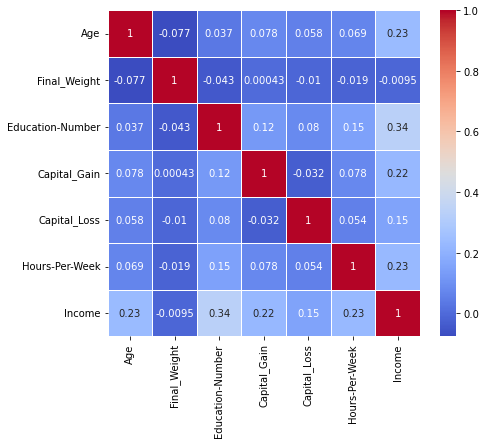

In [ ]:
f, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.concat([x[numerical_cols], y], axis=1).corr(), annot=True, linewidths=0.7, ax=ax,cmap="coolwarm")
plt.show()

In [ ]:
corr = pd.concat([x[numerical_cols], y], axis=1).corr()
# most correlated features with readmitted
corr['Income'].sort_values(ascending=False)

Income              1.000000
Education-Number    0.335154
Age                 0.234037
Hours-Per-Week      0.229689
Capital_Gain        0.223329
Capital_Loss        0.150526
Final_Weight       -0.009463
Name: Income, dtype: float64

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = {}
# convert categorical variables to numerical
for col in categorical_cols:
    le = LabelEncoder()
    label_encoder[col] = le
    x[col] = le.fit_transform(x[col])

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# perform onehotencoder on categorical columns in x
onehotencoder = OneHotEncoder() 
onehotencoder.fit_transform(x[categorical_cols]).toarray().shape

(32561, 102)

In [ ]:
def data_preprocessing(x):
    # convert categorical variables to numerical
    for col in categorical_cols:
        x[col] = label_encoder[col].transform(x[col])
    
    for col in x.columns:
        x[col] = StandardScaler().fit_transform(x[col].values.reshape(-1, 1))

    return x

plot y

/home/cyb3r4dd1ct/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income', ylabel='count'>

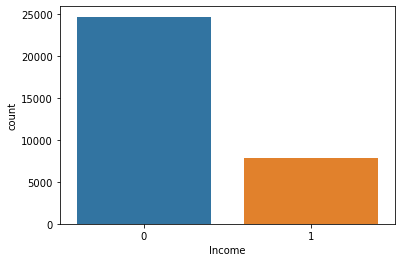

In [ ]:
sns.countplot(y)

rescale values using standard scaler

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# for col in numerical_cols:
for col in x.columns:
    x[col] = StandardScaler().fit_transform(x[col].values.reshape(-1, 1))

# x_scaled = pd.DataFrame(StandardScaler().fit_transform(x), columns=numerical_cols)
x.head()

Age  Work_Class  Final_Weight  Education  Education-Number  \
0  0.030671    2.150579     -1.063611  -0.335437          1.134739   
1  0.837109    1.463736     -1.008707  -0.335437          1.134739   
2 -0.042642    0.090050      0.245079   0.181332         -0.420060   
3  1.057047    0.090050      0.425801  -2.402511         -1.197459   
4 -0.775768    0.090050      1.408176  -0.335437          1.134739   

   Marital_Status  Occupation  Relationship      Race       Sex  Capital_Gain  \
0        0.921634   -1.317809     -0.277805  0.393668  0.703071      0.148453   
1       -0.406212   -0.608387     -0.900181  0.393668  0.703071     -0.145920   
2       -1.734058   -0.135438     -0.277805  0.393668  0.703071     -0.145920   
3       -0.406212   -0.135438     -0.900181 -1.962621  0.703071     -0.145920   
4       -0.406212    0.810458      2.211698 -1.962621 -1.422331     -0.145920   

   Capital_Loss  Hours-Per-Week  Native_Country  
0      -0.21666       -0.035429        0.291569  
1      -0.21666       -2.222153        0.291569  
2      -0.21666       -0.035429        0.291569  
3      -0.21666       -0.035429        0.291569  
4      -0.21666       -0.035429       -4.054223

2023-05-26 19:21:38.335128: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-26 19:21:38.335159: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


<AxesSubplot:>

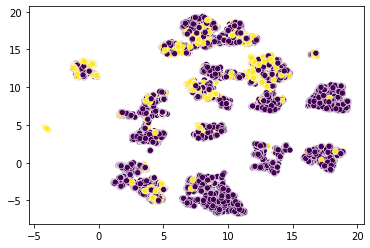

In [ ]:
import umap

reducer = umap.UMAP()
x_umap = reducer.fit_transform(x)
sns.scatterplot(x=x_umap[:, 0], y=x_umap[:, 1], c=y)

<AxesSubplot:>

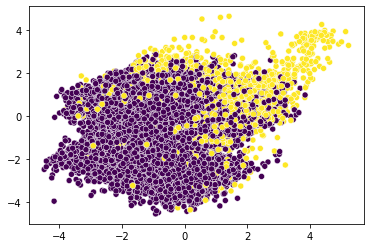

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], c=y)

In [ ]:
x_test = test_data.drop(['Income'], axis=1)
y_test = test_data['Income']

y_test = (y_test=='>50K').astype('int')
x_test = data_preprocessing(x_test)

define function to calculate precision, recall, f1-score, accuracy for validation and test data using a trained model and plot the confusion matrix heatmap

In [ ]:
def train(model, x_train, y_train, x_val, y_val, x_test, y_test):
    model = model()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_train)
    print("Train Accuracy:",metrics.accuracy_score(y_train, y_pred))
    print()
    y_pred = model.predict(x_val)
    print("Val Accuracy:",metrics.accuracy_score(y_val, y_pred))

    print("Val Precision:",metrics.precision_score(y_val, y_pred))
    print("Val Recall:",metrics.recall_score(y_val, y_pred))
    print("Val F1:",metrics.f1_score(y_val, y_pred))
    print()

    y_pred = model.predict(x_test)
    print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred))

    print("Test Precision:",metrics.precision_score(y_test, y_pred))
    print("Test Recall:",metrics.recall_score(y_test, y_pred))
    print("Test F1:",metrics.f1_score(y_test, y_pred))
    # plot confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.show()

encode categorical columns using label encoder or onehotencoder and use standardscaler or minmax scaler 
use different combinations of above with different categorization methods (KNN, SVM, Decision Tree, Random Forest) 
split train data to train and validation sets
and finally use the defined train function

Using:
<class 'sklearn.ensemble._forest.RandomForestClassifier'> OneHotEncoder <class 'sklearn.preprocessing._data.StandardScaler'>
Train Accuracy: 0.8672834766584766

Val Accuracy: 0.8229694457239367
Val Precision: 0.665641813989239
Val Recall: 0.5467171717171717
Val F1: 0.6003466204506066

Test Accuracy: 0.8240280081076101
Test Precision: 0.6526610644257703
Test Recall: 0.5452418096723869
Test F1: 0.5941351466213344


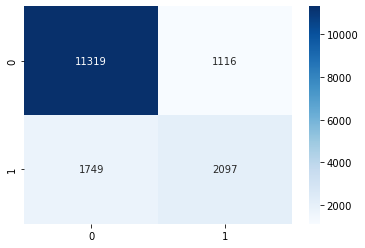



Using:
<class 'sklearn.ensemble._forest.RandomForestClassifier'> OneHotEncoder <class 'sklearn.preprocessing._data.MinMaxScaler'>
Train Accuracy: 0.867360257985258

Val Accuracy: 0.8246583755565792
Val Precision: 0.6710526315789473
Val Recall: 0.5473484848484849
Val F1: 0.6029207232267038

Test Accuracy: 0.8232909526441865
Test Precision: 0.6507936507936508
Test Recall: 0.5436817472698908
Test F1: 0.5924351891202719


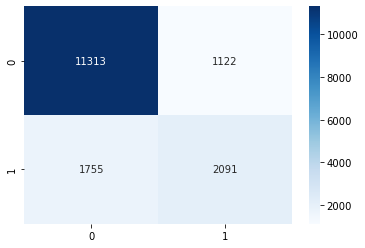



Using:
<class 'sklearn.ensemble._forest.RandomForestClassifier'> LabelEncoder <class 'sklearn.preprocessing._data.StandardScaler'>
Train Accuracy: 0.999884828009828

Val Accuracy: 0.8487640104406572
Val Precision: 0.7345340642129993
Val Recall: 0.5921717171717171
Val F1: 0.6557147850401958

Test Accuracy: 0.8514219028315214
Test Precision: 0.728466218379763
Test Recall: 0.5915236609464378
Test F1: 0.6528913760941312


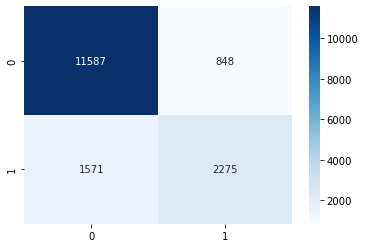



Using:
<class 'sklearn.ensemble._forest.RandomForestClassifier'> LabelEncoder <class 'sklearn.preprocessing._data.MinMaxScaler'>
Train Accuracy: 0.9999232186732187

Val Accuracy: 0.8506064793489944
Val Precision: 0.7388584831899921
Val Recall: 0.5965909090909091
Val F1: 0.6601466992665036

Test Accuracy: 0.8479208893802592
Test Precision: 0.7191298784388995
Test Recall: 0.5845033801352054
Test F1: 0.644865174985657


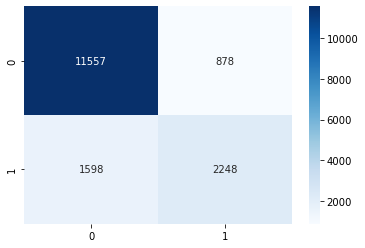



Using:
<class 'sklearn.tree._classes.DecisionTreeClassifier'> OneHotEncoder <class 'sklearn.preprocessing._data.StandardScaler'>
Train Accuracy: 0.867360257985258

Val Accuracy: 0.8157531091662829
Val Precision: 0.6458966565349544
Val Recall: 0.5366161616161617
Val F1: 0.5862068965517242

Test Accuracy: 0.8164117683188993
Test Precision: 0.631724561942822
Test Recall: 0.5343213728549142
Test F1: 0.5789547823637132


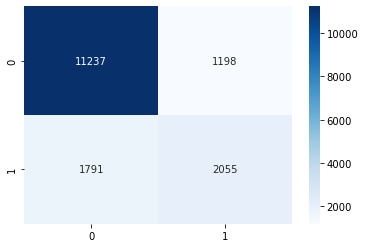



Using:
<class 'sklearn.tree._classes.DecisionTreeClassifier'> OneHotEncoder <class 'sklearn.preprocessing._data.MinMaxScaler'>
Train Accuracy: 0.867360257985258

Val Accuracy: 0.8159066482419776
Val Precision: 0.6466108149276466
Val Recall: 0.5359848484848485
Val F1: 0.5861235761132205

Test Accuracy: 0.8157361341440943
Test Precision: 0.6298342541436464
Test Recall: 0.5335413416536662
Test F1: 0.5777027027027026


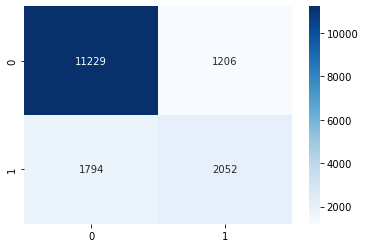



Using:
<class 'sklearn.tree._classes.DecisionTreeClassifier'> LabelEncoder <class 'sklearn.preprocessing._data.StandardScaler'>
Train Accuracy: 0.9999616093366094

Val Accuracy: 0.8163672654690619
Val Precision: 0.626797385620915
Val Recall: 0.6054292929292929
Val F1: 0.6159280667951189

Test Accuracy: 0.8119280142497389
Test Precision: 0.6024568740198641
Test Recall: 0.5993239729589184
Test F1: 0.6008863399374349


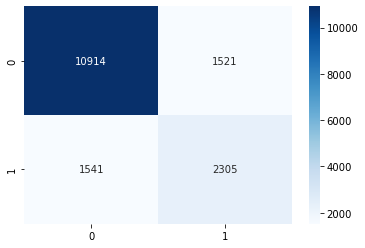



Using:
<class 'sklearn.tree._classes.DecisionTreeClassifier'> LabelEncoder <class 'sklearn.preprocessing._data.MinMaxScaler'>
Train Accuracy: 0.9999616093366094

Val Accuracy: 0.8172884999232305
Val Precision: 0.6289267015706806
Val Recall: 0.6066919191919192
Val F1: 0.6176092544987147

Test Accuracy: 0.8051716725016891
Test Precision: 0.5869901910170366
Test Recall: 0.5912636505460218
Test F1: 0.5891191709844559


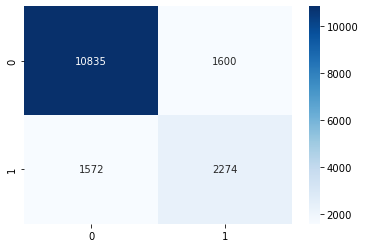



Using:
<class 'sklearn.svm._classes.SVC'> OneHotEncoder <class 'sklearn.preprocessing._data.StandardScaler'>
Train Accuracy: 0.8392582923832924

Val Accuracy: 0.8292645478274221
Val Precision: 0.7103386809269162
Val Recall: 0.5031565656565656
Val F1: 0.5890613451589062

Test Accuracy: 0.8317056691849395
Test Precision: 0.6990640748740101
Test Recall: 0.5049401976079043
Test F1: 0.586352657004831


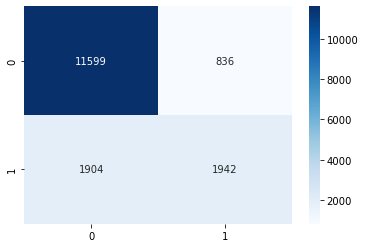



Using:
<class 'sklearn.svm._classes.SVC'> OneHotEncoder <class 'sklearn.preprocessing._data.MinMaxScaler'>
Train Accuracy: 0.8376842751842751

Val Accuracy: 0.8295716259788116
Val Precision: 0.6981605351170569
Val Recall: 0.5271464646464646
Val F1: 0.6007194244604316

Test Accuracy: 0.8350224187703458
Test Precision: 0.6990391214824982
Test Recall: 0.5296411856474259
Test F1: 0.6026627218934911


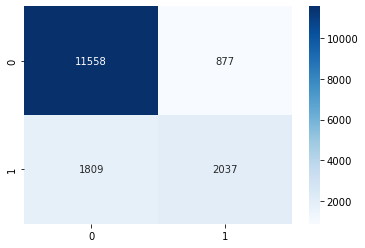



Using:
<class 'sklearn.svm._classes.SVC'> LabelEncoder <class 'sklearn.preprocessing._data.StandardScaler'>
Train Accuracy: 0.8579545454545454

Val Accuracy: 0.8427759864885613
Val Precision: 0.75
Val Recall: 0.5303030303030303
Val F1: 0.621301775147929

Test Accuracy: 0.850991953811191
Test Precision: 0.7561327561327561
Test Recall: 0.5449817992719709
Test F1: 0.6334239951647023


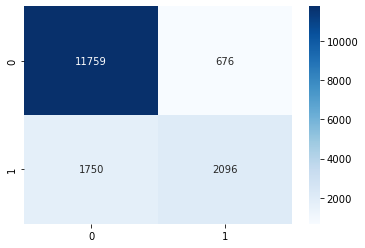



Using:
<class 'sklearn.svm._classes.SVC'> LabelEncoder <class 'sklearn.preprocessing._data.MinMaxScaler'>
Train Accuracy: 0.8489327395577395

Val Accuracy: 0.8433901427913404
Val Precision: 0.7549728752260397
Val Recall: 0.5271464646464646
Val F1: 0.620817843866171

Test Accuracy: 0.8470609913395983
Test Precision: 0.7463662790697675
Test Recall: 0.5340613624544982
Test F1: 0.6226129130039406


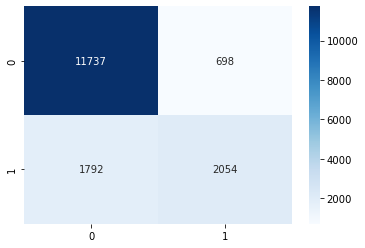



Using:
<class 'sklearn.neighbors._classification.KNeighborsClassifier'> OneHotEncoder <class 'sklearn.preprocessing._data.StandardScaler'>
Train Accuracy: 0.8331541769041769

Val Accuracy: 0.8177491171503147
Val Precision: 0.6542346542346542
Val Recall: 0.5315656565656566
Val F1: 0.5865552072448624

Test Accuracy: 0.8110066949204594
Test Precision: 0.620873939012889
Test Recall: 0.5135205408216329
Test F1: 0.5621175466059486


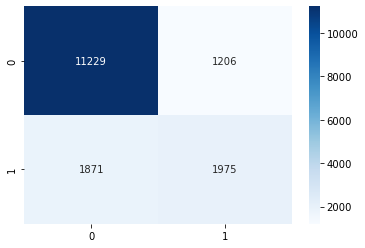



Using:
<class 'sklearn.neighbors._classification.KNeighborsClassifier'> OneHotEncoder <class 'sklearn.preprocessing._data.MinMaxScaler'>
Train Accuracy: 0.8333845208845209

Val Accuracy: 0.8157531091662829
Val Precision: 0.6474654377880185
Val Recall: 0.5321969696969697
Val F1: 0.5841995841995842

Test Accuracy: 0.8148148148148148
Test Precision: 0.6287573597768825
Test Recall: 0.5275611024440978
Test F1: 0.5737310900607946


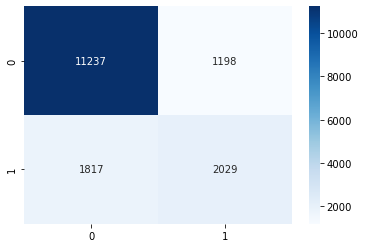



Using:
<class 'sklearn.neighbors._classification.KNeighborsClassifier'> LabelEncoder <class 'sklearn.preprocessing._data.StandardScaler'>
Train Accuracy: 0.8797220515970516

Val Accuracy: 0.8251189927836634
Val Precision: 0.657243816254417
Val Recall: 0.5871212121212122
Val F1: 0.6202067355785261

Test Accuracy: 0.82943308150605
Test Precision: 0.6601738088103086
Test Recall: 0.5728029121164847
Test F1: 0.6133927328414311


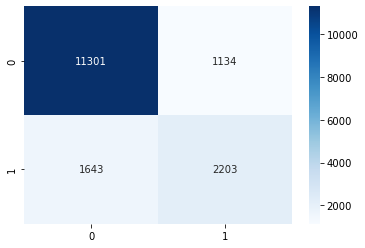



Using:
<class 'sklearn.neighbors._classification.KNeighborsClassifier'> LabelEncoder <class 'sklearn.preprocessing._data.MinMaxScaler'>
Train Accuracy: 0.8754222972972973

Val Accuracy: 0.8194380469829572
Val Precision: 0.6476121562952243
Val Recall: 0.5650252525252525
Val F1: 0.6035064059339177

Test Accuracy: 0.8247650635710337
Test Precision: 0.6484304932735426
Test Recall: 0.5639625585023401
Test F1: 0.6032540675844806


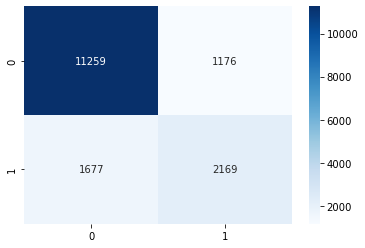

In [ ]:
for model in [RandomForestClassifier, DecisionTreeClassifier, SVC, KNeighborsClassifier]:
    for label_enc in ['OneHotEncoder', 'LabelEncoder']:
        for scaler in StandardScaler, MinMaxScaler:
            x = train_data.drop(['Income'], axis=1)
            y = train_data['Income']
            y = (y=='>50K').astype('int')
            
            x_test = test_data.drop(['Income'], axis=1)
            y_test = test_data['Income']
            y_test = (y_test=='>50K').astype('int')
            
            if label_enc == 'LabelEncoder':
                label_encoder = {}
                for col in categorical_cols:
                    le = LabelEncoder()
                    label_encoder[col] = le
                    x[col] = le.fit_transform(x[col])
                    
                for col in categorical_cols:
                    x_test[col] = label_encoder[col].transform(x_test[col])
            else:
                one_hot_encoder = OneHotEncoder()
                x = one_hot_encoder.fit_transform(x[categorical_cols]).toarray()
                x_test = one_hot_encoder.transform(x_test[categorical_cols]).toarray()


            x = scaler().fit_transform(x)
            x_test = scaler().fit_transform(x_test)
            x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=10)
            
            print("Using:")
            print(model, label_enc, scaler)
            train(model, x_train, y_train, x_val, y_val, x_test, y_test)
            print()
            print()